## CENIPA

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lendo o dataset

ocorrencia.csv colunas
codigo_ocorrencia
codigo_ocorrencia1
codigo_ocorrencia2
codigo_ocorrencia3	
ocorrencia_classificacao
ocorrencia_uf
ocorrencia_aerodromo
ocorrencia_dia
ocorrencia_hora


ocorrencia_tipo.csv colunas
codigo_ocorrencia1
ocorrencia_tipo

aeronave.csv 
codigo_ocorrencia2
aeronave_operador_categoria
aeronave_tipo_veiculo

fator_contribuinte.csv
codigo_ocorrencia3
fator_nome
fator_area


In [3]:
# 1-
principal = pd.read_csv("./data/ocorrencia.csv", sep=';', parse_dates=['ocorrencia_dia'],skip_blank_lines=True)
# estas são as tabelas aeronave.csv  fator_contribuinte.csv  ocorrencia.csv  ocorrencia_tipo.csv
ocorrencia_tipo = pd.read_csv("./data/ocorrencia_tipo.csv", sep=';', skip_blank_lines=True)

aeronave = pd.read_csv("./data/aeronave.csv", sep=';', skip_blank_lines=True)

fator_contribuinte = pd.read_csv("./data/fator_contribuinte.csv", sep=';', skip_blank_lines=True)


In [4]:
novoprincipal = principal.merge(ocorrencia_tipo,how='inner',on=['codigo_ocorrencia1'])
nprin = novoprincipal.merge(aeronave, how='inner', on = ['codigo_ocorrencia2'])
# zprin = nprin.merge(fator_contribuinte, how='inner', on = ['codigo_ocorrencia3']) 'fator_nome','fator_area'

In [6]:
umdf = nprin.loc[:,['codigo_ocorrencia','ocorrencia_classificacao', 'ocorrencia_uf' ,'ocorrencia_aerodromo', 'ocorrencia_dia' ,'ocorrencia_hora','ocorrencia_tipo',
                    'aeronave_operador_categoria','aeronave_tipo_veiculo']]

In [7]:
umdf.head()
umdf.to_csv('./data/ocorrencias_abril2010_jun2020.csv')


### Limpeza

In [3]:
ocorrencia = pd.read_csv('./data/ocorrencias_abril2010_jun2020.csv', parse_dates=['ocorrencia_dia'], index_col='Unnamed: 0')

In [61]:
ocorrencia.fator_nome.unique()

array(['APLICAÇÃO DE COMANDOS', 'JULGAMENTO DE PILOTAGEM',
       'PLANEJAMENTO DE VOO', 'PROCESSO DECISÓRIO', 'INDISCIPLINA DE VOO',
       'MANUTENÇÃO DA AERONAVE', 'PLANEJAMENTO GERENCIAL',
       'SUPERVISÃO GERENCIAL', 'CAPACITAÇÃO E TREINAMENTO',
       'CULTURA ORGANIZACIONAL', 'ESQUECIMENTO DO PILOTO', 'INSTRUÇÃO',
       'MEMÓRIA', 'MOTIVAÇÃO', 'ORGANIZAÇÃO DO TRABALHO',
       'POUCA EXPERIÊNCIA DO PILOTO', 'PROCESSOS ORGANIZACIONAIS',
       'SISTEMAS DE APOIO', 'PESSOAL DE APOIO', 'ATITUDE',
       'CONDIÇÕES METEOROLÓGICAS ADVERSAS', 'COORDENAÇÃO DE CABINE',
       'CULTURA DO GRUPO DE TRABALHO', 'PERCEPÇÃO', 'ANSIEDADE',
       'ATENÇÃO', 'FABRICAÇÃO', 'INFRAESTRUTURA AEROPORTUÁRIA', 'FADIGA',
       'INDÍCIOS DE ESTRESSE', 'USO DE MEDICAMENTO', 'DIETA INADEQUADA',
       'INSÔNIA', 'DESVIO DE NAVEGAÇÃO', 'OUTRO FATOR',
       'INFLUÊNCIA DO MEIO AMBIENTE', 'RELAÇÕES INTERPESSOAIS',
       'ESTADO EMOCIONAL', 'COMUNICAÇÃO', 'DINÂMICA DE EQUIPE',
       'CONDIÇÕES FÍSICAS 

In [4]:
# da linha 1 a 3 localiza os indices 
len(ocorrencia)
ocorrencia.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,ocorrencia_tipo,aeronave_operador_categoria,aeronave_tipo_veiculo,fator_nome,fator_area
0,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,APLICAÇÃO DE COMANDOS,FATOR OPERACIONAL
1,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,JULGAMENTO DE PILOTAGEM,FATOR OPERACIONAL
2,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PLANEJAMENTO DE VOO,FATOR OPERACIONAL
3,39527,ACIDENTE,MT,****,2010-04-01,17:30:00,OPERAÇÃO A BAIXA ALTITUDE,***,AVIÃO,PROCESSO DECISÓRIO,FATOR HUMANO
4,39707,INCIDENTE GRAVE,AM,****,2010-09-01,12:30:00,COM TREM DE POUSO,***,AVIÃO,INDISCIPLINA DE VOO,FATOR OPERACIONAL


In [217]:
nunico = ocorrencia.groupby(['codigo_ocorrencia','fator_area'])['fator_area'].value_counts()#.sort_values(by='ocorrencia_uf',ascending=True)
nunico#.reset_index()
# nunico.plot.barh(y='ocorrencia_uf')

codigo_ocorrencia  fator_area         fator_area       
39115              FATOR HUMANO       FATOR HUMANO         2
                   FATOR OPERACIONAL  FATOR OPERACIONAL    4
39156              FATOR OPERACIONAL  FATOR OPERACIONAL    3
39235              FATOR OPERACIONAL  FATOR OPERACIONAL    2
39275              FATOR HUMANO       FATOR HUMANO         7
                                                          ..
79671              FATOR OPERACIONAL  FATOR OPERACIONAL    1
79692              FATOR HUMANO       FATOR HUMANO         3
                   FATOR OPERACIONAL  FATOR OPERACIONAL    2
79713              FATOR HUMANO       FATOR HUMANO         4
                   FATOR OPERACIONAL  FATOR OPERACIONAL    3
Name: fator_area, Length: 1682, dtype: int64

<AxesSubplot:ylabel='fator_area'>

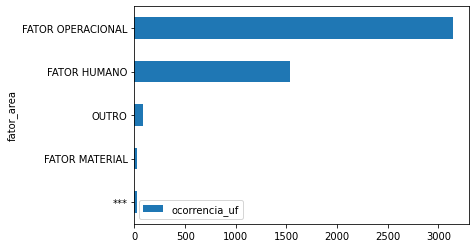

In [200]:
# Trazer ocorrencias unicas de cidade estado
nd = ocorrencia.groupby('fator_area').count().sort_values(by='ocorrencia_uf',ascending=True)
nd.plot.barh(y='ocorrencia_uf')

<AxesSubplot:ylabel='fator_nome'>

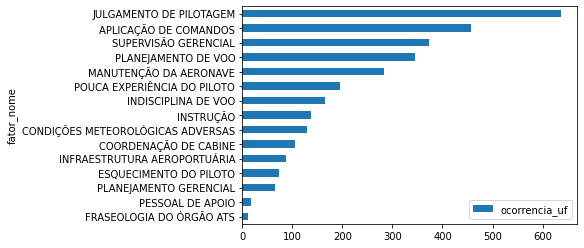

In [122]:
pp = ocorrencia.loc[ocorrencia.fator_area == 'FATOR OPERACIONAL']#.sort_values(by='fator_area')#,ascending=False)
gby = pp.groupby('fator_nome').count().sort_values(by=['codigo_ocorrencia'],ascending=True)
gby10 = gby[gby.codigo_ocorrencia > 10]
gby10
gby10.plot.barh(y='ocorrencia_uf')

<AxesSubplot:ylabel='fator_nome'>

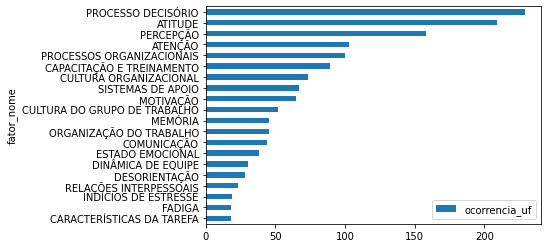

In [123]:
pp = ocorrencia.loc[ocorrencia.fator_area == 'FATOR HUMANO']#.sort_values(by='fator_area')#,ascending=False)
gby = pp.groupby('fator_nome').count().sort_values(by=['codigo_ocorrencia'],ascending=True)
gby10 = gby[gby.codigo_ocorrencia > 10]
gby10
gby10.plot.barh(y='ocorrencia_uf')

Quais fatores mais influenciaram para o acidente acontecer? netes 10 anos dos acidentes registrados.

<AxesSubplot:ylabel='fator_nome'>

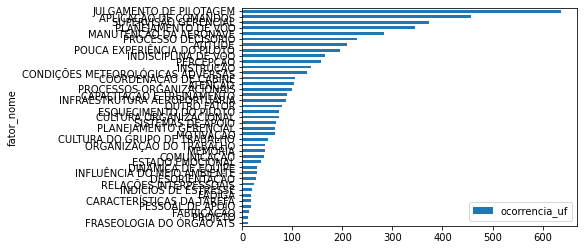

In [114]:
# esta ok.
pp = ocorrencia.groupby(['fator_nome']).count().sort_values(by=['fator_area','fator_nome'],ascending=True)
pp[pp.fator_area > 10].plot.barh(y='ocorrencia_uf')

#### Alterar os dados de uma coluna

### Total de Incidentes e Acidentes

<AxesSubplot:>

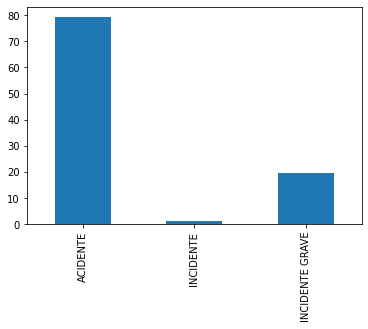

In [205]:
ocorrencia['ocorrencia_classificacao'].value_counts().div(len(ocorrencia)).mul(100).sort_index().plot.bar()
# ocorrencia['ocorrencia_classificacao'].value_counts().div(len(ocorrencia)).mul(100).sort_index()

In [206]:
cda = ocorrencia.groupby(['aeronave_tipo_veiculo','ocorrencia_classificacao']).count().sort_values(by='aeronave_tipo_veiculo',ascending=True)['codigo_ocorrencia']
total = ocorrencia.groupby(['aeronave_tipo_veiculo']).count().sort_values(by='aeronave_tipo_veiculo',ascending=True)['codigo_ocorrencia']
cda = cda.div(total).mul(100).reset_index()
cda.loc[(cda.aeronave_tipo_veiculo == 'AVIÃO') | (cda.aeronave_tipo_veiculo == 'HELICÓPTERO')]

,aeronave_tipo_veiculo,ocorrencia_classificacao,codigo_ocorrencia
2,AVIÃO,ACIDENTE,76.841010
3,AVIÃO,INCIDENTE,1.144939
4,AVIÃO,INCIDENTE GRAVE,22.014052
5,HELICÓPTERO,ACIDENTE,86.956522
6,HELICÓPTERO,INCIDENTE,0.845411
7,HELICÓPTERO,INCIDENTE GRAVE,12.198068


 ### Qual o estado que contem mais ocorrencia_classificacao

### Ocorrencia por estado
14,8% acidentes relatados são do estado de são paulo  

In [163]:
ge = ocorrencia.groupby(['ocorrencia_uf','ocorrencia_classificacao']).count().sort_values(by='codigo_ocorrencia',ascending=True)/len(ocorrencia)
# ge['codigo_ocorrencia'][ge.codigo_ocorrencia> 0.01].mul(100).plot.barh()
ge['codigo_ocorrencia'][ge.codigo_ocorrencia> 0.01].mul(100)
# ge.mul(100).plot.barh()

ocorrencia_uf  ocorrencia_classificacao
MG             INCIDENTE GRAVE              1.038422
BA             INCIDENTE GRAVE              1.059190
TO             ACIDENTE                     1.059190
PE             INCIDENTE GRAVE              1.163032
SE             ACIDENTE                     1.163032
CE             ACIDENTE                     1.266874
PA             INCIDENTE GRAVE              1.349948
RS             INCIDENTE GRAVE              1.349948
GO             INCIDENTE GRAVE              1.391485
RJ             INCIDENTE GRAVE              1.433022
AM             INCIDENTE GRAVE              1.453790
RR             ACIDENTE                     1.578401
DF             INCIDENTE GRAVE              1.723780
MA             ACIDENTE                     1.827622
PR             INCIDENTE GRAVE              1.910696
PE             ACIDENTE                     2.118380
MS             ACIDENTE                     2.201454
SC             ACIDENTE                     2.512980
SP    

### Por estado do maior numero de incidentes para o menor

### Ocorrencia por Estado por tipo de classificação

In [134]:
group_by_por_estado = ocorrencia.groupby(['ocorrencia_uf','ocorrencia_classificacao'])['ocorrencia_classificacao'].count()
group_by_por_estado

ocorrencia_uf  ocorrencia_classificacao
***            ACIDENTE                      3
AC             ACIDENTE                     16
               INCIDENTE GRAVE              18
AL             ACIDENTE                     27
               INCIDENTE GRAVE              11
                                          ... 
SE             INCIDENTE GRAVE               1
SP             ACIDENTE                    716
               INCIDENTE GRAVE             131
TO             ACIDENTE                     51
               INCIDENTE GRAVE              11
Name: ocorrencia_classificacao, Length: 65, dtype: int64